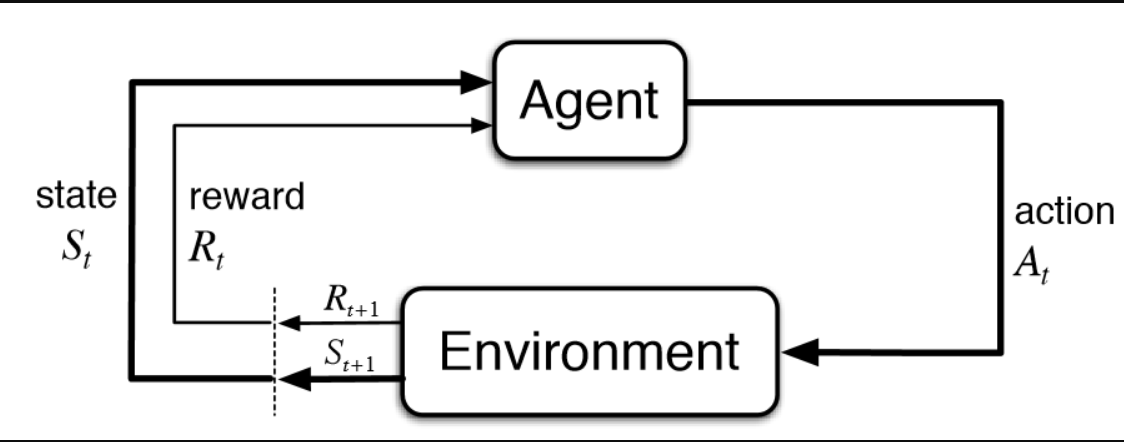

# The Anatomy of the agent
The entities in RL's worlds are,
- The agent class: A thing, or person , that tries to gain rewards by interaction. In prectice, the agent is a piece of code that implement some policy.
- The environment class: It's a model of the world that is external to the agent . It provides observations and rewards to agent.


# Simple Code implementation
To make the things very simple, let's create a dummy environment that gives the agent some random rewards everytime, regardless of the agent's actions.

Though this is not of any practical usage, it allow us to focus on implementation of environment and agent classes.

Our environment class should be capable of handling actions received from the agent. This is done by action method, which checks the number of steps left and return a random reward, by ignoring the agent's action.

__init__ constructor is called to set the number of episodes for the event, get_observation() method is supposed to return the current environment's observation to the agent, but in this case returns a zero vector.

Other methods are mostly self explanatory, get_actions returns 0 or 1 corresponding to two available actions.is_done cecks the end of episode.

In [11]:
import random
from typing import List

class SampleEnvironment:
    
    # Constructor defining the variable (the game ends in 20 steps)
    def __init__(self):
        self.steps_left=20
        
    # information regarding environment with three coordinate
    def get_observation(self) -> List[float]:
        return [0.0, 0.0, 0.0]
    
    # rewards after an any actions, 1,0 -> positive and negative rewards respectively
    def get_actions(self) -> List[int]:
        return [0, 1]
    
    # when game is done then it returns some bool value 
    def is_done(self) -> bool:
        return self.steps_left==0
    
    # If the game is not done then action is continue 
    def action(self, action: int) -> float:
        if self.is_done():
            raise Exception("Game is over")
        # step is reduce by 1
        self.steps_left -= 1
        return random.random()

The agent's class simple and includes only two methods: the constructor and the method that performs one step in the environment

Initially the total rewards collected is set to zero by the constructor.

The step function accepts environment instances as an argument and allow agent to perform the following actions:
- Observed the environment
- Make a decision about the action to take based on the observations
- Submit the action to the environment
- Get the reward for the current step

In [12]:
# the agent is perform the some kind of policy
class Agent:
    def __init__(self):
        # initial reward is zero
        self.total_reward=0.0
        
    # steps by agent (this function call previous cell code snippet)
    def step(self,env: SampleEnvironment):
        current_obs=env.get_observation()
        print("Observation {}".format(current_obs))
        actions=env.get_actions()
        print(actions)
        # randomly choose an action
        reward=env.action(random.choice(actions))
        self.total_reward+=reward
        print("Total Reward {}".format(self.total_reward))

In [13]:
if __name__ == "__main__":
    env=SampleEnvironment()
    agent=Agent()
    i=0
    
    while not env.is_done():
        i+=1
        print("Steps {}".format(i))
        # calls the step function
        agent.step(env)
        
    print("Total reward got: %.4f" % agent.total_reward)

Steps 1
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 0.7843705880616254
Steps 2
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 0.8693493047153349
Steps 3
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 0.9931844090918209
Steps 4
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 1.4671701488192312
Steps 5
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 1.6369329270300677
Steps 6
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 1.9125832455255898
Steps 7
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 2.6039648749491495
Steps 8
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 3.6013690551174036
Steps 9
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 3.8407764035204157
Steps 10
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 4.566122018042651
Steps 11
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 4.634814155927906
Steps 12
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 4.7539213530618145
Steps 13
Observation [0.0, 0.0, 0.0]
[0, 1]
Total Reward 5.376215244877881
Steps 14
Observation [0.